In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# import and prepare data

ob = pd.read_csv('BTC-USD_order_book.csv')
ob.fillna(value=0, inplace=True)
ob.index = ob['Unnamed: 0']
ob.drop('Unnamed: 0', axis=1, inplace=True)
best = ob[['best_bid','best_ask']]
ob.drop(['best_bid','best_ask'], axis=1, inplace=True)
ob.columns = ob.columns.astype(float)
cols = np.array(ob.columns)

In [3]:
# calculate buckets

num_buckets = 200

window = 50

bucket_size = (window*2)/num_buckets

mid = (cols.max()-cols.min())/2+cols.min()

#bucket_size = (cols.max()-cols.min())/num_buckets

cols = pd.Series(cols)

buckets = {}
start = mid - window
for n in range(0,num_buckets):
    #TODO: Make sure that the between function uses does not include the right value
    buckets[n] = cols[cols.between(start, start+bucket_size)]
    start = start+bucket_size

#buckets = np.split(cols, 24, axis=0)
bucketed = {}

for n in range(0, len(buckets)):
    bucketed[float(buckets[n].iloc[0])] = pd.to_numeric(ob[buckets[n]].sum(axis=1))

In [4]:
# create figures

#for n in range(len(bucketed[5854.0])):
for n in range(0,100):
    ax = pd.DataFrame(bucketed).iloc[n].plot.bar(ylim=(0,5), figsize=(40,10))
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.vlines(min(range(len(pd.DataFrame(bucketed).iloc[n])), key=lambda i: abs(pd.DataFrame(bucketed).iloc[n].index[i]-best['best_bid'].iloc[n])), ymin=ymin, ymax=ymax, color = 'r', linestyles ='dashed', label = 'best_bid')
    #ax.axvline(x=ob['best_ask'].iloc[3]/pd.DataFrame(bucketed).iloc[3][-1], ymin=0, ymax=1, color='r')
    #plt.axvline(x=6520, color='k', linestyle='--')
    #plt.vlines(x = 6520, ymin = 0, ymax = 2000, color = 'blue', linewidth=5)
    plt.legend()
    plt.savefig("fig_{}".format(n))
    plt.clf()

<Figure size 2880x720 with 0 Axes>

In [5]:
# resample columns to reflect distance from best bid/ask

resampled = {}
for n in range(len(ob)):
    temp = pd.DataFrame(ob.iloc[n])
    temp['diff']= temp.index-best.iloc[n][0]
    temp.index = temp['diff']
    temp.drop('diff', axis=1, inplace=True)
    resampled[ob.index[n]] = temp.squeeze()
ob_diff = pd.DataFrame(resampled).T.fillna(value=0)

In [6]:
#prepare diff data

ob_diff.columns = ob_diff.columns.astype(float)
cols_diff = np.array(ob_diff.columns)

In [7]:
# calculate diff buckets

num_buckets = 3000
window = 15

bucket_size = round((window*2)/num_buckets,2)

cols_diff = pd.Series(cols_diff)

buckets_diff = {}
start = -window
for n in range(0,num_buckets):
    #TODO: Make sure that the between function uses does not include the right value
    buckets_diff[n] = cols_diff[cols_diff.between(start, start+bucket_size)]
    start = start+bucket_size

#buckets = np.split(cols, 24, axis=0)
bucketed_diff = {}

for n in range(0, len(buckets_diff)):
    bucketed_diff[round(float(buckets_diff[n].iloc[0]),2)] = pd.to_numeric(ob_diff[buckets_diff[n]].sum(axis=1))

In [10]:
bucketed_diff

{-15.0: 2019-03-20 02:33:41.028939     0.004690
 2019-03-20 02:33:44.596476     0.004690
 2019-03-20 02:33:48.794004     0.004690
 2019-03-20 02:33:52.488155     0.004690
 2019-03-20 02:33:57.281801     0.004690
 2019-03-20 02:34:02.061960     0.004690
 2019-03-20 02:34:04.925895     0.004690
 2019-03-20 02:34:08.610613     0.004690
 2019-03-20 02:34:12.832297     0.004690
 2019-03-20 02:34:15.345907     0.004690
 2019-03-20 02:34:19.402764     0.004690
 2019-03-20 02:34:23.820531     0.004690
 2019-03-20 02:34:27.273516     0.004690
 2019-03-20 02:34:29.402338     0.004690
 2019-03-20 02:34:32.132727     0.004690
 2019-03-20 02:34:36.927521     0.004690
 2019-03-20 02:34:40.724432     0.004690
 2019-03-20 02:34:45.374501     0.004690
 2019-03-20 02:34:47.589683     0.004690
 2019-03-20 02:34:49.554263     0.004690
 2019-03-20 02:34:53.951921     0.004690
 2019-03-20 02:34:57.514925     0.004690
 2019-03-20 02:35:00.723377     0.004690
 2019-03-20 02:35:03.200709     0.004690
 2019-03-

In [ ]:
# create diff figures

for n in range(0,len(bucketed_diff[-15.0])):
    ax = pd.DataFrame(bucketed_diff).iloc[n].plot.bar(ylim=(0,30), figsize=(40,10))
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.vlines(len(bucketed_diff)/2, ymin=ymin, ymax=ymax, color = 'r', label = 'best_bid')
    #ax.axvline(x=ob['best_ask'].iloc[3]/pd.DataFrame(bucketed).iloc[3][-1], ymin=0, ymax=1, color='r')
    #plt.axvline(x=6520, color='k', linestyle='--')
    #plt.vlines(x = 6520, ymin = 0, ymax = 2000, color = 'blue', linewidth=5)
    plt.legend()
    plt.savefig("fig_{}".format(n))
    plt.clf()

KeyboardInterrupt: 

In [7]:
buy_pressure = pd.DataFrame(bucketed_diff)[list(np.arange(-1,0,0.5))].sum(axis=1)
sell_pressure = pd.DataFrame(bucketed_diff)[list(np.arange(0,1,0.5))].sum(axis=1)

In [22]:
buy_pressure_weighted = pd.DataFrame(bucketed_diff)[list(np.around(np.arange(-2,0,0.01),2))].dot(1/pd.DataFrame(bucketed_diff)[list(np.around(np.arange(-2,0,0.01),2))].columns)
sell_pressure_weighted = pd.DataFrame(bucketed_diff)[list(np.around(np.arange(0.01,2.01,0.01),2))].dot(1/pd.DataFrame(bucketed_diff)[list(np.around(np.arange(0.01,2.01,0.01),2))].columns)

In [152]:
pressure = pd.DataFrame({'price':(best['best_bid']).fillna(value=0),'pressure':buy_pressure_weighted-sell_pressure_weighted})

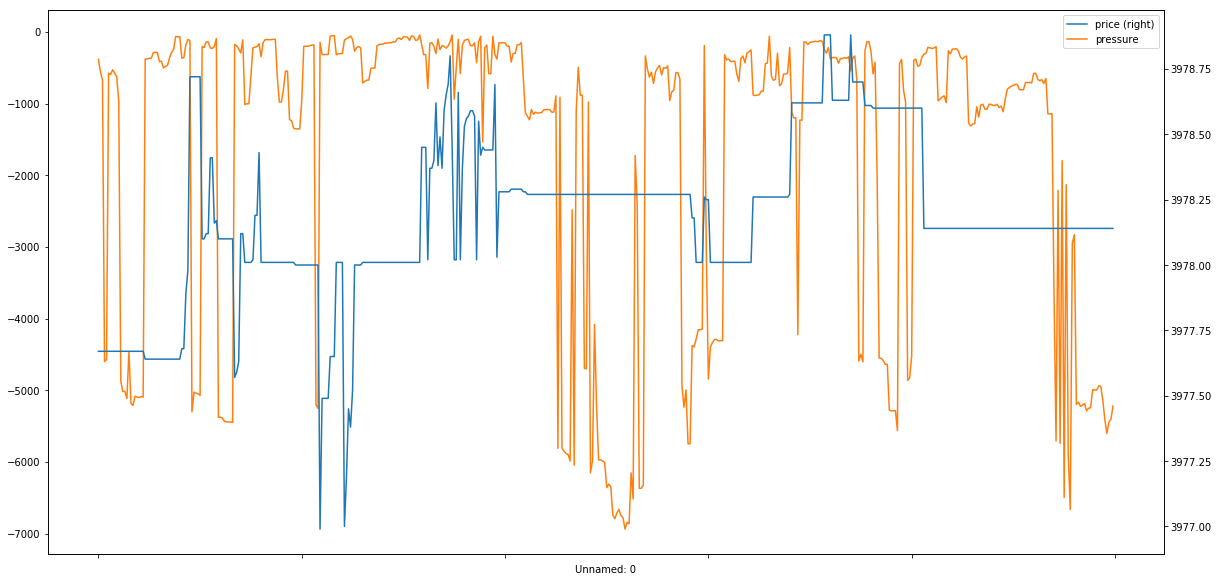

In [153]:
pressure.iloc[500:1000].plot(secondary_y='price',figsize=(20,10))
plt.show()

In [154]:
pressure['d_pressure'] = (pressure['pressure'] - pressure['pressure'].shift(1)).fillna(value=0)
pressure['d_price'] = (pressure['price'] - pressure['price'].shift(1)).fillna(value=0)

In [155]:
pressure.corr()

,price,pressure,d_pressure,d_price
price,1.000000,-0.057541,-0.011541,0.110714
pressure,-0.057541,1.000000,0.321119,0.019907
d_pressure,-0.011541,0.321119,1.000000,-0.112605
d_price,0.110714,0.019907,-0.112605,1.000000


In [188]:
#pressure_movements = pressure.loc[pressure['d_price']!=0]
pressure_movements = pressure

In [189]:
pressure_movements['price_bin'] = np.select([(pressure_movements['d_price']>0).astype(bool), (pressure_movements['d_price']==0).astype(bool), (pressure_movements['d_price']<0).astype(bool)],[1,0,-1])
pressure_movements['pressure_bin'] = np.select([(pressure_movements['d_price']>0).astype(bool), (pressure_movements['d_pressure']==0).astype(bool), (pressure_movements['d_pressure']<0).astype(bool)],[1,0,-1])

In [190]:
pressure_movements.corr()

,price,pressure,d_pressure,d_price,price_bin,pressure_bin
price,1.000000,-0.057541,-0.011541,0.110714,0.080757,0.252031
pressure,-0.057541,1.000000,0.321119,0.019907,0.085413,0.264182
d_pressure,-0.011541,0.321119,1.000000,-0.112605,-0.163618,0.160479
d_price,0.110714,0.019907,-0.112605,1.000000,0.517416,0.281729
price_bin,0.080757,0.085413,-0.163618,0.517416,1.000000,0.518231
pressure_bin,0.252031,0.264182,0.160479,0.281729,0.518231,1.000000


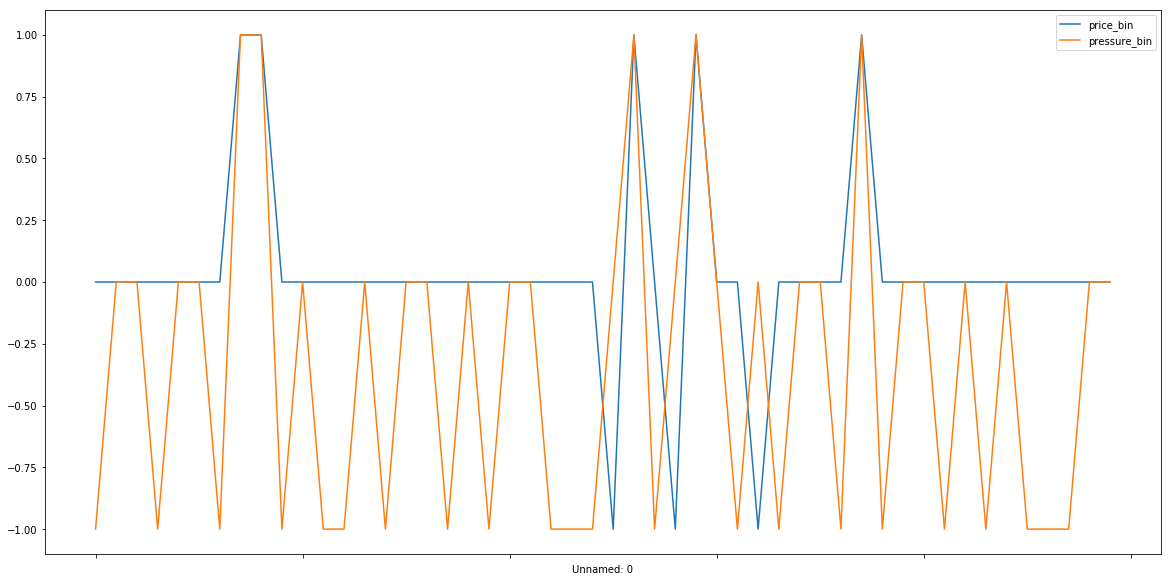

In [191]:
pressure_movements[['price_bin','pressure_bin']].iloc[200:250].plot(figsize=(20,10))
plt.show()

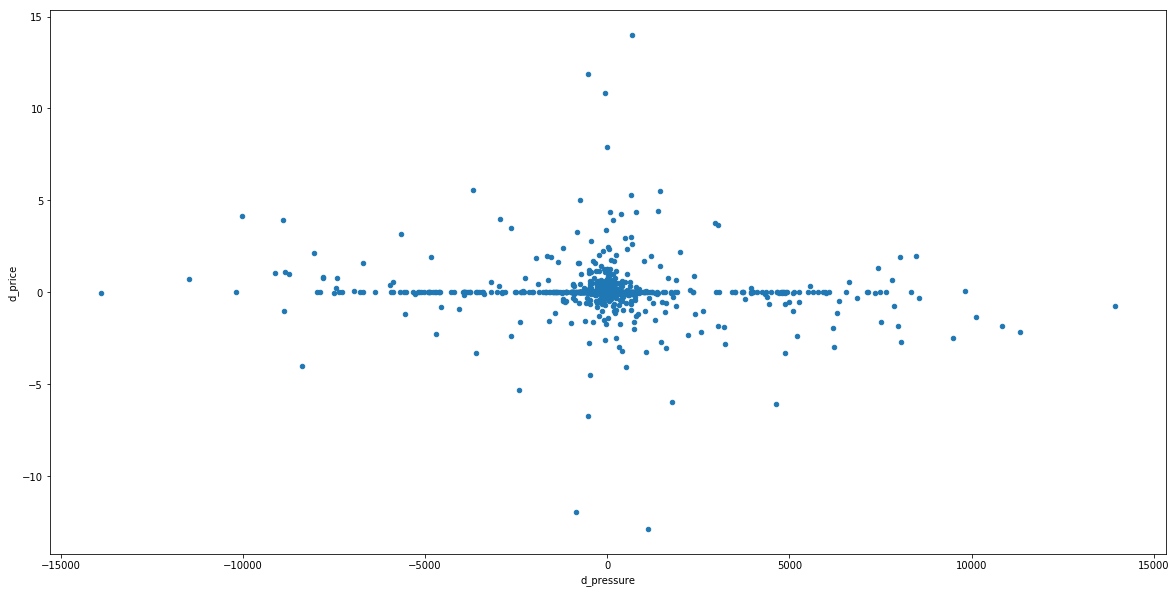

In [168]:
pressure_movements[['d_pressure','d_price']].plot.scatter(x='d_pressure',y='d_price', figsize=(20,10))
plt.show()

In [127]:
pressure_movements['hit_rate'] = np.where(1, pressure_movements['pressure_bin']==pressure_movements['price_bin'], 0)

In [128]:
pressure_movements['hit_rate'].sum()/len(pressure_movements['hit_rate'])

0.38465298142717497

In [38]:
pressure_movements['hit_rate'].sum()

169

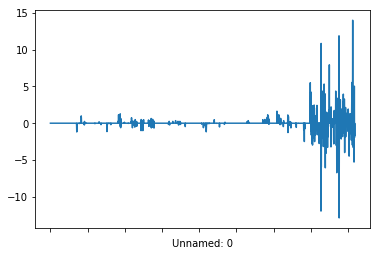

In [130]:
pressure_movements['price'].plot()
plt.show()

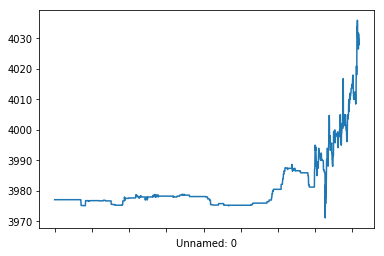

In [129]:
best['best_bid'].plot()
plt.show()

In [145]:
clf = RandomForestClassifier(n_estimators=100, max_depth=30,random_state=0)

In [146]:
X = np.array(pd.DataFrame(bucketed_diff)[list(np.around(np.arange(-2,0,0.01),2))])

In [147]:
y= pressure_movements['price_bin']

In [148]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

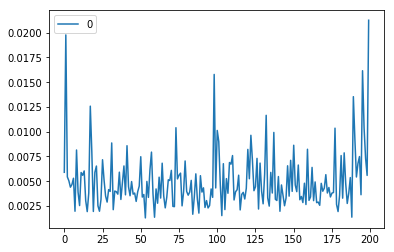

In [149]:
pd.DataFrame(clf.feature_importances_).plot()
plt.show()

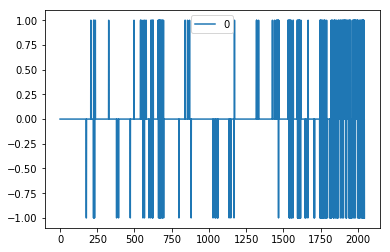

In [150]:
pd.DataFrame(clf.predict(X)).plot()
plt.show()

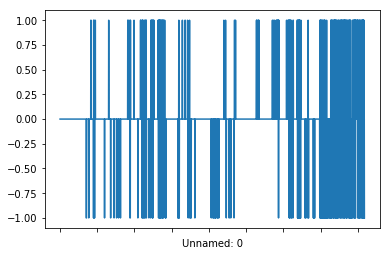

In [151]:
pressure_movements['price_bin'].plot()
plt.show()